In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

import numpy as np
import pandas as pd
import os
import glob
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

eps = np.finfo(float).eps

plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
num_items = 5000
batch_size = 64
lr = 0.03

In [4]:
lr_hist = [lr]
for batch_idx in range(num_items // batch_size):
    step = np.clip(batch_idx / num_items, 0, 1)
    lr = lr * np.cos(step * (7 * np.pi) / 16)
    lr_hist.append(lr)

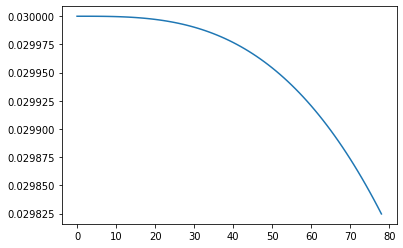

In [5]:
plt.plot(lr_hist)

In [7]:
def _cosine_warmup_scheduler(curr_step):
    if curr_step < num_warmup_steps:
        return float(curr_step) / float(max(1, num_warmup_steps))
    else:
        value = np.cos(7 * np.pi / 16. * (curr_step - num_warmup_steps) / (num_train_steps - num_warmup_steps))
        return max(0, value)
                       

In [10]:
num_warmup_steps = 0
num_train_steps = num_items // batch_size
lr = 0.03
lr_hist = [lr]
for curr_step in range(num_items // batch_size):
    lr *= _cosine_warmup_scheduler(curr_step)
    lr_hist.append(lr)

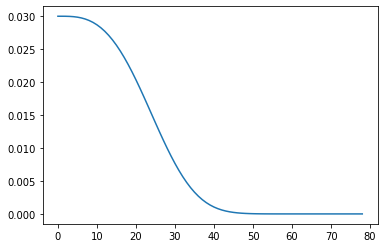

In [11]:
plt.plot(lr_hist)